In [ ]:
 !pip install -q kaggle
 from google.colab import files 
 files.upload() #put kaggle.json API
!mkdir ~/.kaggle 
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia #download at .zip
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

In [ ]:
#imports
from time import time
import tensorflow as tf
import numpy as np
import os
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, losses
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D, Dense, Dropout , BatchNormalization
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.python.keras.applications.vgg16 import preprocess_input #preprocess FOR VGG16
from keras.callbacks import EarlyStopping,ModelCheckpoint

In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory('./chest_xray/chest_xray/train',target_size=(224, 224),batch_size=32,shuffle=True,class_mode='binary')
test_generator = test_datagen.flow_from_directory('./chest_xray/chest_xray/test',target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Utilisation du modèle VGG16

In [ ]:
#VGG 16
model = keras.models.Sequential()

model.add(Conv2D(input_shape=(224,224,3), kernel_size=(3,3),filters=64,padding="same", activation="relu"))
model.add(Conv2D(kernel_size=(3,3), filters=64, padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2))) #move 2 pixels by 2 pixels

model.add(Conv2D(kernel_size=(3,3), filters=128, padding="same", activation="relu"))
model.add(Conv2D(kernel_size=(3,3), filters=128, padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(kernel_size=(3,3), filters=256, padding="same", activation="relu"))
model.add(Conv2D(kernel_size=(3,3), filters=256, padding="same", activation="relu"))
model.add(Conv2D(kernel_size=(3,3), filters=256, padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(kernel_size=(3,3), filters=512, padding="same", activation="relu"))
model.add(Conv2D(kernel_size=(3,3), filters=512, padding="same", activation="relu"))
model.add(Conv2D(kernel_size=(3,3), filters=512, padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(4096, activation="relu"))
model.add(Dense(4096, activation="relu"))
model.add(Dense(2, activation="softmax"))
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
model.summary()

(1, 224, 224, 3)
[[0.4064215 0.5935785]]


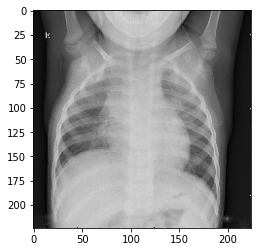

In [ ]:
from keras_preprocessing import image
images = image.load_img("/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg", target_size=(224,224,3))    
x = image.img_to_array(images)
plt.imshow(x.astype('uint8'))
x = np.expand_dims(x, axis=0) 
print(x.shape)
model_outpout = model.predict(x)
print(model_outpout)

Epoch 1/5
163/163 [==============================] - 194s 1s/step - loss: 0.4826 - accuracy: 0.7870 - val_loss: 0.5350 - val_accuracy: 0.6907
Epoch 2/5
163/163 [==============================] - 167s 1s/step - loss: 0.2966 - accuracy: 0.8715 - val_loss: 0.7418 - val_accuracy: 0.7452
Epoch 3/5
163/163 [==============================] - 168s 1s/step - loss: 0.2422 - accuracy: 0.9003 - val_loss: 0.4626 - val_accuracy: 0.8173
Epoch 4/5
163/163 [==============================] - 167s 1s/step - loss: 0.2175 - accuracy: 0.9109 - val_loss: 0.4203 - val_accuracy: 0.8301
Epoch 5/5
163/163 [==============================] - 168s 1s/step - loss: 0.1930 - accuracy: 0.9296 - val_loss: 0.3700 - val_accuracy: 0.8670


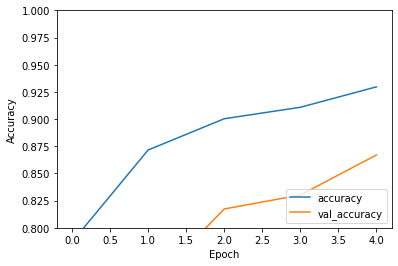

In [ ]:
history = model.fit(train_generator,validation_data=test_generator,epochs=5)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch') 
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.show()

# Tentative de modèle

In [ ]:
#first try model
model2 = keras.models.Sequential()
#stride = 1 : we move 1 pixel by 1 for conv
model2.add(Conv2D(128, (3,3), strides=(1,1), activation="relu", input_shape=(128,128,3), padding="same"))
model2.add(MaxPool2D(2))

model2.add(Conv2D(64, (3,3), strides=(1,1), activation="relu", padding="same"))
model2.add(MaxPool2D(2))

model2.add(Conv2D(32, (3,3), strides=(1,1), activation="relu", padding="same"))
model2.add(MaxPool2D(2))

model2.add(Conv2D(16, (3,3), strides=(1,1), activation="relu", padding="same"))
model2.add(MaxPool2D(2))
#fully connected layers
model2.add(Flatten())
model2.add(Dense(32, activation="relu"))
model2.add(Dense(2, activation="softmax"))

model2.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 16)        4

In [ ]:
IMGSIZE = 128

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,#random rotation
        zoom_range=0.2, #random zoom
        horizontal_flip=True)#Randomly flip inputs horizontally
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        './chest_xray/chest_xray/train',
        target_size=(IMGSIZE, IMGSIZE),
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        './chest_xray/chest_xray/test',
        target_size=(IMGSIZE, IMGSIZE),
        class_mode='binary')
print(train_generator.image_shape)
print(train_generator.class_indices )

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
(128, 128, 3)
{'NORMAL': 0, 'PNEUMONIA': 1}


Epoch 1/5
163/163 [==============================] - 113s 495ms/step - loss: 0.4286 - accuracy: 0.8044 - val_loss: 0.3566 - val_accuracy: 0.8413
Epoch 2/5
163/163 [==============================] - 77s 472ms/step - loss: 0.2412 - accuracy: 0.9018 - val_loss: 0.3241 - val_accuracy: 0.8814
Epoch 3/5
163/163 [==============================] - 72s 440ms/step - loss: 0.2120 - accuracy: 0.9170 - val_loss: 0.3793 - val_accuracy: 0.8686
Epoch 4/5
163/163 [==============================] - 70s 432ms/step - loss: 0.1854 - accuracy: 0.9294 - val_loss: 0.5141 - val_accuracy: 0.8301
Epoch 5/5
163/163 [==============================] - 70s 430ms/step - loss: 0.1776 - accuracy: 0.9314 - val_loss: 0.4446 - val_accuracy: 0.8333


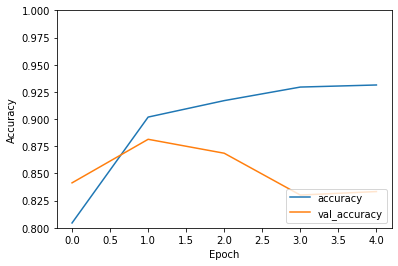

In [ ]:
history = model2.fit(train_generator,validation_data=validation_generator,epochs=5)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch') 
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
scores = model2.evaluate(validation_generator)
print("Loss of the model: %.2f"%(scores[0]))
print("Test Accuracy: %.2f%%"%(scores[1] * 100))

20/20 [==============================] - 5s 230ms/step - loss: 0.4802 - accuracy: 0.8590
Loss of the model: 0.48
Test Accuracy: 85.90%


(1, 128, 128, 3)
[[0.00113182 0.9988682 ]]
Le modèle prédit que le patient est  malade (pneumonie) avec une probabilité de  99.88 %


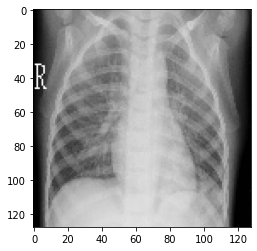

In [ ]:
from keras_preprocessing import image
images = image.load_img("/content/chest_xray/chest_xray/val/PNEUMONIA/person1950_bacteria_4881.jpeg", target_size=(128,128,3))    
x = image.img_to_array(images)
plt.imshow(x.astype('uint8'))
x = np.expand_dims(x, axis=0)
x = x/255.0
print(x.shape)
model_outpout = model2.predict(x)
print(model_outpout)
if model_outpout[0,0] > model_outpout[0,1]:
  val = "normal"
  max = 0
else:
  val = "malade (pneumonie)"
  max = 1
#print(model_outpout)
#print(x.shape)
print("Le modèle prédit que le patient est ", val, "avec une probabilité de ", str(model_outpout[0, max]*100)[:5], "%")